## Sentiment and Time Series on ProjectTweets dataset.

Version control link: https://github.com/mariadominguez2023/CA2-BDS-ADA.git

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

#Sentiment Analysis libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Time series and forecasting libraries
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from skforecast.model_selection import grid_search_forecaster


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Read data from csv file**

In [2]:
data = pd.read_csv('ProjectTweets.csv')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
#Shape of the dataframe
data.shape

(1599999, 6)

In [4]:
#Checking the type of data
#data.info()

In [5]:
# Data preparation
# ==============================================================================
data = data.rename(columns={'1467810369': 'Tweet_ID', 'Mon Apr 06 22:19:45 PDT 2009': 'date','_TheSpecialOne_': 'Twitter_User'})
data.head()

,0,Tweet_ID,date,NO_QUERY,Twitter_User,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
data['NO_QUERY'].count()

1599999

In [7]:
def format_data(data):

  last_col = str(data.columns[-1])
  #first_col = str(data.columns[0])

  data.rename(columns = {last_col: 'tweet_text'}, inplace=True) 

  # Change 0, 2, 4 to negative, neutral and positive
 # labels = {0: 'negative', 2: 'neutral', 4: 'positive'}
  #data['polarity'] = data['polarity'].map(labels)

  # Get only the two columns
  return data[['Tweet_ID','date','Twitter_User','tweet_text']]

In [8]:
data = format_data(data)
data.head(10)

,Tweet_ID,date,Twitter_User,tweet_text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew
5,1467811592,Mon Apr 06 22:20:03 PDT 2009,mybirch,Need a hug
6,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,1467811795,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,1467812025,Mon Apr 06 22:20:09 PDT 2009,mimismo,@twittera que me muera ?
9,1467812416,Mon Apr 06 22:20:16 PDT 2009,erinx3leannexo,spring break in plain city... it's snowing


In [9]:
#Creating a new column "title_mod" using lambda function
data["tweet_mod"]=data["tweet_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,@kwesidei not the whole crew


In [11]:
#Removing any special character from text
data["tweet_mod"]=data["tweet_mod"].str.replace("[^\w\s]","")

In [12]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew


In [13]:
#pip install textblob

In [14]:
#Importing textblow library
from textblob import TextBlob

In [15]:
# Extract the emotional value, the sentiment from this text
#first number is the sentimient, second is the number times this words is talked about
data["tweet_mod"][:5].apply(lambda x : TextBlob(x).sentiment)

0       (0.0, 0.0)
1       (0.5, 0.5)
2       (0.2, 0.4)
3    (-0.625, 1.0)
4       (0.2, 0.4)
Name: tweet_mod, dtype: object

In [16]:
#creating a new column "sentiment"
#going through each of the comments and exgtracting the sentiment analysis stored into it
data["sentiment"]=data["tweet_mod"].apply(lambda x: TextBlob(x).sentiment[0])

In [17]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,0.000
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,-0.625
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew,0.200


In [73]:
#import numpy as np
#Applying lambda function to categorise the sentimente of the text either "negative" or positive.
data['sentiment_score'] = data['sentiment'].apply(lambda x: 'Positive' if x > 0.2 else('Neutral' if x == 0.2 else 'Negative'))
#df['Polarity_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [74]:
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,0.000,Negative
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500,Positive
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200,Neutral
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,-0.625,Negative
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew,0.200,Neutral


In [18]:
data.tail()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment
1599994,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,1.0000
1599995,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt intervie...,0.2775
1599996,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...,0.2000
1599997,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...,0.8000
1599998,2193602129,Tue Jun 16 08:40:50 PDT 2009,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,happy charitytuesday thenspcc sparkscharity sp...,0.8000


**Plot the Sentiment_score visualization graph**

<Axes: xlabel='sentiment_score', ylabel='count'>

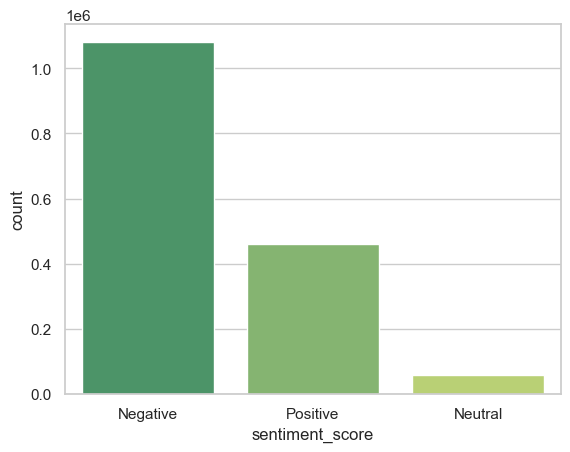

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment_score',data=data, palette='summer')

**Data Preprocessing**

In [77]:
data_Positive = data[data['sentiment_score'] == 'Positive'][0:8000] 
data_Neutral = data[data['sentiment_score'] == 'Neutral']
data_Negative = data[data['sentiment_score'] == 'Negative']

**Sample negative and neutral polarity dataset and create final dataframe**

In [78]:
data_Neutral_final = data_Neutral.sample(8000, replace=True)
data_Negative_final = data_Negative.sample(8000, replace=True)
data_sample = pd.concat([data_Positive, data_Neutral_final, data_Negative_final], axis=0)

In [79]:
data_sample.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500000,Positive
6,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time no see yes rains a bit ...,0.273333,Positive
17,1467813579,Mon Apr 06 22:20:31 PDT 2009,starkissed,@LettyA ahh ive always wanted to see rent lov...,lettya ahh ive always wanted to see rent love ...,0.500000,Positive
19,1467813985,Mon Apr 06 22:20:37 PDT 2009,quanvu,@alydesigns i was out most of the day so didn'...,alydesigns i was out most of the day so didnt ...,0.350000,Positive
27,1467815199,Mon Apr 06 22:20:56 PDT 2009,abel209,ooooh.... LOL that leslie.... and ok I won't ...,ooooh lol that leslie and ok i wont do it agai...,0.225000,Positive


In [80]:
data_sample.shape

(24000, 7)

**Text Preprocessing**

In [81]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Apply the method "get_text_processing" into column review text**

In [82]:
data_sample['Project_tweets'] = data_sample['tweet_mod'].apply(get_text_processing)
data_sample.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment,sentiment_score,Project_tweets
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500000,Positive,kenichan dived many times ball managed save 50...
6,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time no see yes rains a bit ...,0.273333,Positive,loltrish hey long time see yes rains bit bit l...
17,1467813579,Mon Apr 06 22:20:31 PDT 2009,starkissed,@LettyA ahh ive always wanted to see rent lov...,lettya ahh ive always wanted to see rent love ...,0.500000,Positive,lettya ahh ive always wanted see rent love sou...
19,1467813985,Mon Apr 06 22:20:37 PDT 2009,quanvu,@alydesigns i was out most of the day so didn'...,alydesigns i was out most of the day so didnt ...,0.350000,Positive,alydesigns day didnt get much done
27,1467815199,Mon Apr 06 22:20:56 PDT 2009,abel209,ooooh.... LOL that leslie.... and ok I won't ...,ooooh lol that leslie and ok i wont do it agai...,0.225000,Positive,ooooh lol leslie ok wont leslie wont get mad


**Visualize Project tweets with sentiment score**

In [83]:
data_new = data_sample[['Project_tweets', 'sentiment_score']]
data_new.head()

,Project_tweets,sentiment_score
1,kenichan dived many times ball managed save 50...,Positive
6,loltrish hey long time see yes rains bit bit l...,Positive
17,lettya ahh ive always wanted see rent love sou...,Positive
19,alydesigns day didnt get much done,Positive
27,ooooh lol leslie ok wont leslie wont get mad,Positive


**Apply One hot encoding on negative, neutral, and positive**

In [84]:
one_hot = pd.get_dummies(data_sample["sentiment_score"])
data_new.drop(['sentiment_score'],axis=1,inplace=True)
data_score = pd.concat([data_new,one_hot],axis=1)
data_score.head()

,Project_tweets,Negative,Neutral,Positive
1,kenichan dived many times ball managed save 50...,0,0,1
6,loltrish hey long time see yes rains bit bit l...,0,0,1
17,lettya ahh ive always wanted see rent love sou...,0,0,1
19,alydesigns day didnt get much done,0,0,1
27,ooooh lol leslie ok wont leslie wont get mad,0,0,1


**Apply Train Test Split**

In [85]:
X = data_score['Project_tweets'].values
y = data_score.drop('Project_tweets', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [86]:
X

array(['kenichan dived many times ball managed save 50 rest go bounds',
       'loltrish hey long time see yes rains bit bit lol im fine thanks hows',
       'lettya ahh ive always wanted see rent love soundtrack', ...,
       'kezzawezz want 2 dinna hink itll get shown elgin n got nae1 2 go withn',
       'shoutout boys jalapeno assiting class today jyr8 holding kids thats',
       'aaronwall rustybrick got hit wonder next httpbitlyabn5u'],
      dtype=object)

In [87]:
#y

**Apply vectorization**

In [88]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Apply frequency, inverse document frequency:**

In [89]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

**Build Neural Network model by adding different layers**

In [90]:
model = Sequential()

model.add(Dense(units=1000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

**Fit the Model**

In [91]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=0, callbacks=early_stop)

Epoch 3: early stopping


**Evaluation of Model**

In [92]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=0)
print('Test accuracy:', model_score[1])

Test accuracy: 0.8109722137451172


**Prediction**

In [93]:
preds = model.predict(X_test)
preds

225/225 [==============================] - 6s 26ms/step


array([[0.5165794 , 0.01167173, 0.47174883],
       [0.9667382 , 0.01776323, 0.01549853],
       [0.8904234 , 0.01111596, 0.0984605 ],
       ...,
       [0.97600096, 0.0089475 , 0.01505157],
       [0.00944598, 0.01810429, 0.9724497 ],
       [0.00952599, 0.00293891, 0.9875351 ]], dtype=float32)

## **Times Series section**

In [18]:
#checking data head to start the time series analysis
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,0.000
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,-0.625
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew,0.200


In [19]:
#verify the shape of the data
data.shape

(1599999, 6)

In [20]:
#data.info()

In [21]:
#Checking null values
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [22]:
#We still have null values on my dataset
data.isnull().sum()

Tweet_ID        0
date            0
Twitter_User    0
tweet_text      0
tweet_mod       0
sentiment       0
dtype: int64

In [23]:
data['date'] = data.date.astype('datetime64[ns]')
#data = data.set_index('date')
#data = data.sort_index()
data.head()

,Tweet_ID,date,Twitter_User,tweet_text,tweet_mod,sentiment
0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,0.000
1,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...,0.500
2,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200
3,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,-0.625
4,1467811372,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew,kwesidei not the whole crew,0.200


In [24]:
#Checking data types on this dataframe
data.dtypes

Tweet_ID                 int64
date            datetime64[ns]
Twitter_User            object
tweet_text              object
tweet_mod               object
sentiment              float64
dtype: object

In [25]:
data = data[['date', 'sentiment']]
data.head()

,date,sentiment
0,2009-04-06 22:19:49,0.000
1,2009-04-06 22:19:53,0.500
2,2009-04-06 22:19:57,0.200
3,2009-04-06 22:19:57,-0.625
4,2009-04-06 22:20:00,0.200


In [26]:
#Boxplot of Month-wise (Seasonal) 
# Draw Plot
#You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

# Prepare data
#data['year'] = [d.year for d in data.date]
#data['month'] = [d.strftime('%b') for d in data.date]
#years = data['year'].unique()

#fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#sns.boxplot(x='year', y='sentiment', data=data, ax=axes[0])
#sns.boxplot(x='month', y='sentiment', data=data.loc[~data.year.isin([2009]), :])

# Set Title
#axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
#axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
#plt.show()

In [27]:
#Rename the dependent variable
data = data.rename(columns = {'sentiment' : 'y'})
data.head(5)

,date,y
0,2009-04-06 22:19:49,0.000
1,2009-04-06 22:19:53,0.500
2,2009-04-06 22:19:57,0.200
3,2009-04-06 22:19:57,-0.625
4,2009-04-06 22:20:00,0.200


In [28]:
#data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')# %H:%M:%S') # '%Y-%m-%d %H:%M:%S'
#data = data.set_index('date')
#data = data.asfreq('MS')
#data = data.sort_index()
#data.head()

In [29]:
#data = pd.to_datetime(data['date'], format='%Y-%m-%d')
#data.head()

In [30]:
data = data.drop_duplicates('date').sort_values(by=['date'], ascending=True)

In [31]:
data.shape

(774362, 2)

In [32]:
data = data.set_index('date')
data = data.sort_index()
data.head()

,y
date,
2009-04-06 22:19:49,0.0
2009-04-06 22:19:53,0.5
2009-04-06 22:19:57,0.2
2009-04-06 22:20:00,0.2
2009-04-06 22:20:03,0.0


In [33]:
data = data['y'].resample('D').count()
#print(data)

In [34]:
#daily_data = daily_data.set_index('date')
#daily_data = daily_data.sort_index()
data.index

DatetimeIndex(['2009-04-06', '2009-04-07', '2009-04-08', '2009-04-09',
               '2009-04-10', '2009-04-11', '2009-04-12', '2009-04-13',
               '2009-04-14', '2009-04-15', '2009-04-16', '2009-04-17',
               '2009-04-18', '2009-04-19', '2009-04-20', '2009-04-21',
               '2009-04-22', '2009-04-23', '2009-04-24', '2009-04-25',
               '2009-04-26', '2009-04-27', '2009-04-28', '2009-04-29',
               '2009-04-30', '2009-05-01', '2009-05-02', '2009-05-03',
               '2009-05-04', '2009-05-05', '2009-05-06', '2009-05-07',
               '2009-05-08', '2009-05-09', '2009-05-10', '2009-05-11',
               '2009-05-12', '2009-05-13', '2009-05-14', '2009-05-15',
               '2009-05-16', '2009-05-17', '2009-05-18', '2009-05-19',
               '2009-05-20', '2009-05-21', '2009-05-22', '2009-05-23',
               '2009-05-24', '2009-05-25', '2009-05-26', '2009-05-27',
               '2009-05-28', '2009-05-29', '2009-05-30', '2009-05-31',
      

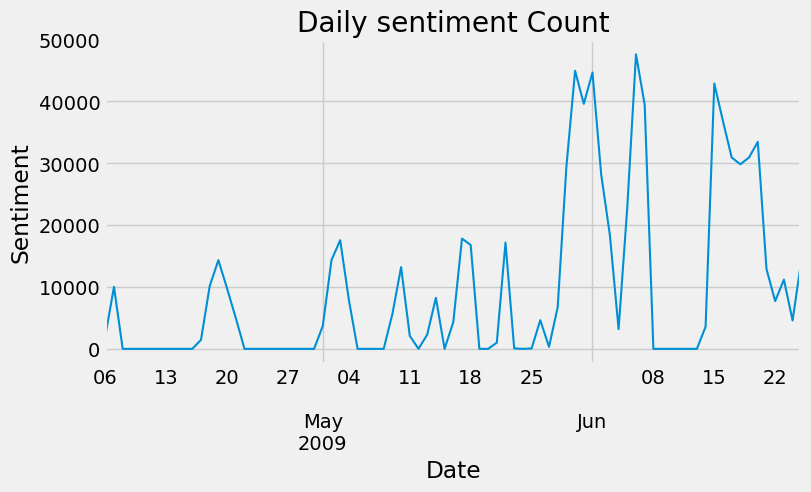

In [35]:
# Plot the time series of daily tweet count
plt.figure(figsize=(8, 4))
data.plot()
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Daily sentiment Count')
plt.show()

In [36]:
#Visualizing the data
#plt.xlabel('date')
#plt.ylabel('sentiment')
#plt.plot(date)

In [37]:
data.head

<bound method NDFrame.head of date
2009-04-06     2039
2009-04-07    10029
2009-04-08        0
2009-04-09        0
2009-04-10        0
              ...  
2009-06-21    12909
2009-06-22     7718
2009-06-23    11195
2009-06-24     4584
2009-06-25    14293
Freq: D, Name: y, Length: 81, dtype: int64>

In [38]:
data = pd.DataFrame(data)
print(data.get("y"))

date
2009-04-06     2039
2009-04-07    10029
2009-04-08        0
2009-04-09        0
2009-04-10        0
              ...  
2009-06-21    12909
2009-06-22     7718
2009-06-23    11195
2009-06-24     4584
2009-06-25    14293
Freq: D, Name: y, Length: 81, dtype: int64


In [39]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(data['y'])
#stationarity
print('Dickey Fuller p-value: %F' % stationarity[1])

Dickey Fuller p-value: 0.000613


α = 0.05

H0 : the data is not stationary

H1: the data is stationary  there is a pattern

How do we know if we accept or reject the hypothesis? To reject the hypothesis, p-value must be less than α, which as a default is 0.05.

P-value is less than α. Ho is rejected and H1 is accepted as data is stationary

In [40]:
# Verify that a temporary index is complete
# ==============================================================================
(data.index == pd.date_range(start=data.index.min(),
                             end=data.index.max(),
                             freq=data.index.freq)).all()

True

Train dates : 2009-04-06 00:00:00 --- 2009-06-18 00:00:00  (n=74)
Test dates  : 2009-06-19 00:00:00 --- 2009-06-25 00:00:00  (n=7)


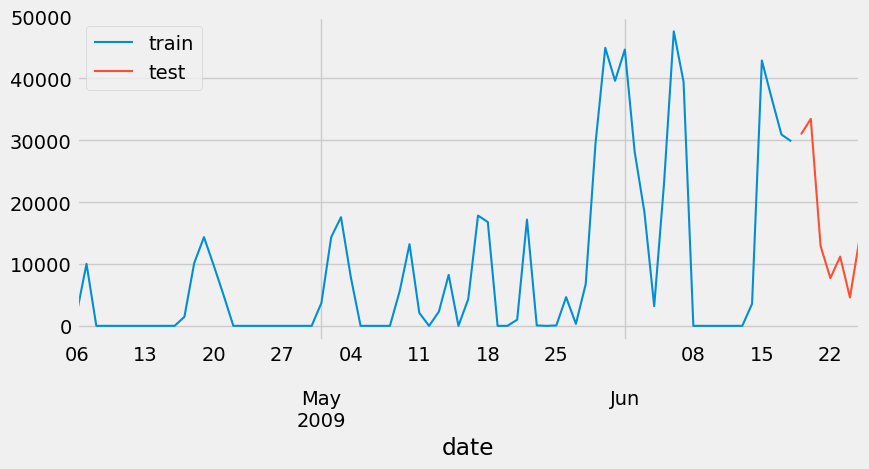

In [41]:
# Split data into train-test
# ==============================================================================
steps = 7 # 7 days to predict the 8 day 
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

In [42]:
#pip install skforecast --user

In [43]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags =7 # 6 months to predict the 7 month 
                )

forecaster.fit(y=data_train['y'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2009-04-06 00:00:00'), Timestamp('2009-06-18 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-07 13:24:31 
Last fit date: 2023-11-07 13:24:31 
Skforecast version: 0.10.1 
Python version:

In [44]:
# Predictions
# ==============================================================================
steps = 7 # 36 months into the future
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2009-06-19    32530.64
2009-06-20    36840.95
2009-06-21    36468.56
2009-06-22    32802.15
2009-06-23    28418.00
Freq: D, Name: pred, dtype: float64

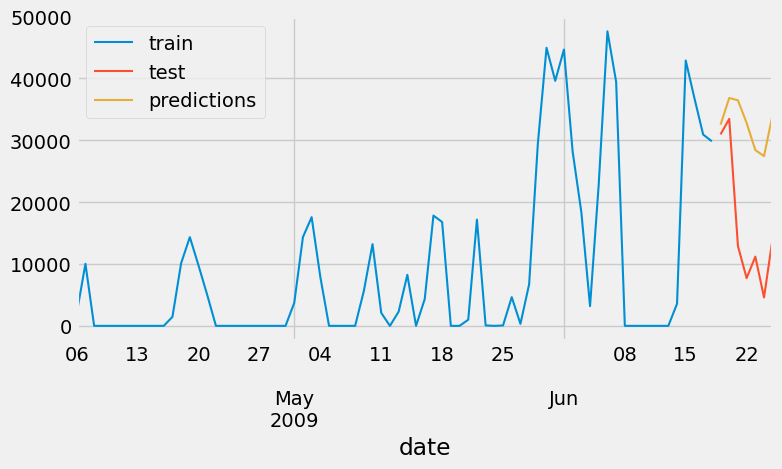

In [45]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [46]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 345044715.56962854


In [47]:
# Hyperparameter Grid search
# ==============================================================================
steps = 7
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 10 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500], # number of trees
              'max_depth': [3, 5, 10]}  #depth of the tree

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 296605786.134648



In [48]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",2.966058e+08,5,500
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",3.076627e+08,10,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",3.085480e+08,3,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",3.094522e+08,3,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",3.096213e+08,5,100
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",3.153480e+08,10,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",3.491654e+08,3,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",3.572623e+08,3,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",3.684135e+08,10,100
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",3.743440e+08,5,500


In [49]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=5, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['y'])

In [50]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

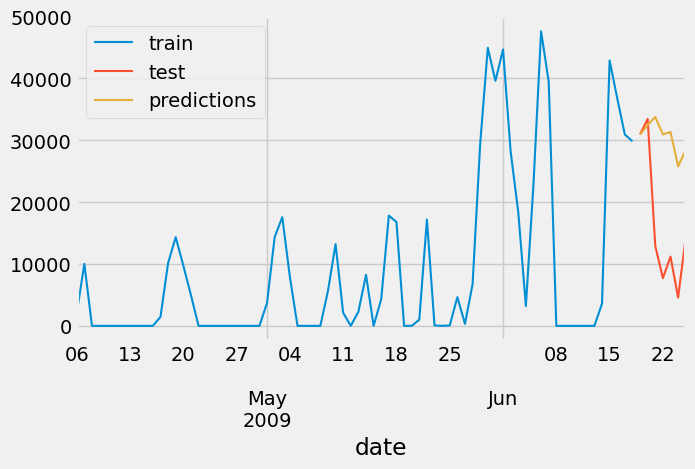

In [51]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [52]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 290294298.20736974


*30 days forecasting**

Train dates : 2009-04-06 00:00:00 --- 2009-05-26 00:00:00  (n=51)
Test dates  : 2009-05-27 00:00:00 --- 2009-06-25 00:00:00  (n=30)


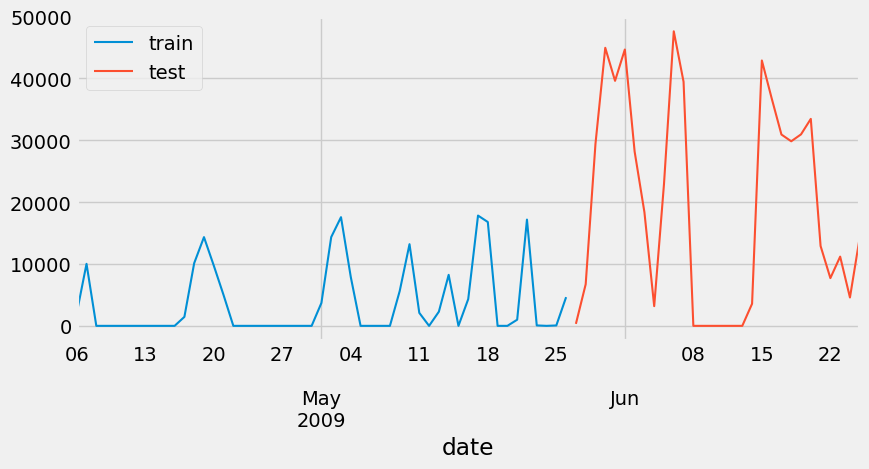

In [53]:
# Split data into train-test
# ==============================================================================
steps = 30 # 30 days to predict the 31 day 
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

In [54]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags =30 # 30 days to predict the 31 day 
                )

forecaster.fit(y=data_train['y'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 
Transformer for y: None 
Transformer for exog: None 
Window size: 30 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2009-04-06 00:00:00'), Timestamp('2009-05-26 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-07 13:24:54 
L

In [55]:
# Predictions
# ==============================================================================
steps = 30 # 30 days into the future
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2009-05-27    3485.50
2009-05-28    4701.63
2009-05-29    6007.77
2009-05-30    8693.62
2009-05-31    6710.23
Freq: D, Name: pred, dtype: float64

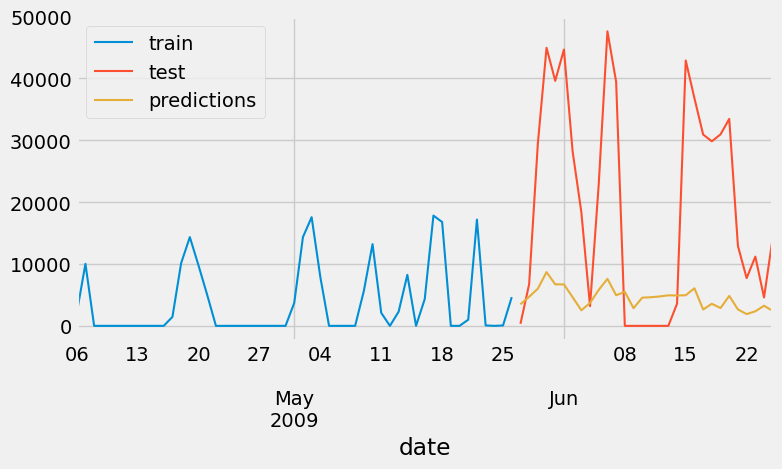

In [56]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [57]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 475618509.75405663


In [58]:
# Hyperparameter Grid search
# ==============================================================================
steps = 30
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500], # number of trees
              'max_depth': [3, 5, 10]}  #depth of the tree

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 45963127.328326926



In [59]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",4.596313e+07,5,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",4.596313e+07,10,100
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",4.666392e+07,3,100
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",6.423380e+07,5,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",6.423380e+07,10,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",6.487370e+07,3,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",6.966069e+07,3,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",6.966069e+07,3,500
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",6.966069e+07,5,100
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",6.966069e+07,5,500


In [60]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=5, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['y'])

In [61]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

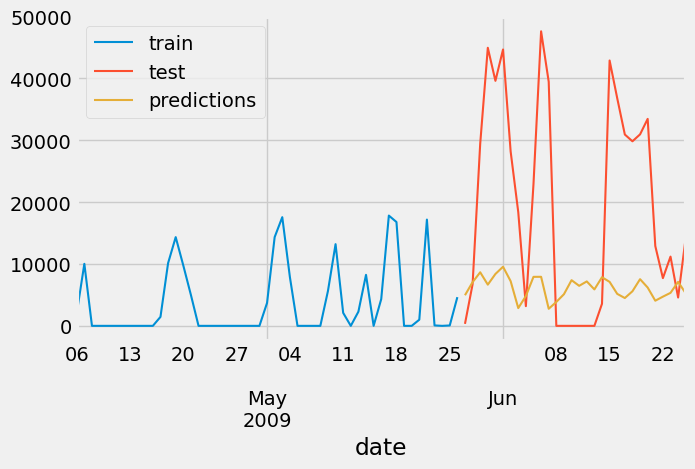

In [62]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [63]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 442384326.7091291


*ARMA model*

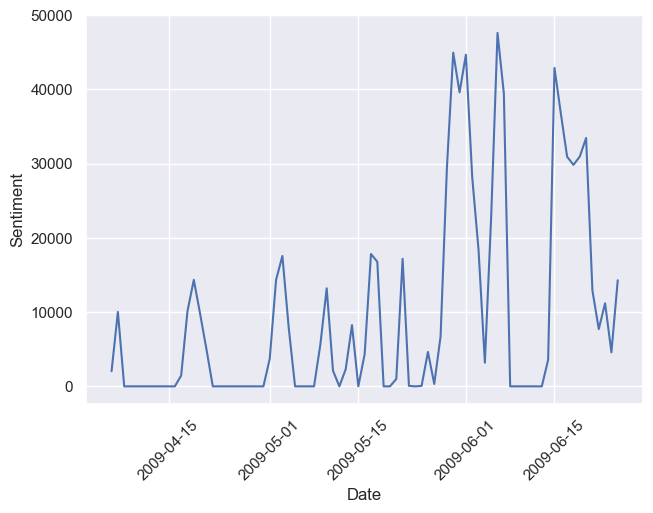

In [64]:
sns.set()
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(data.index, data['y'], )
plt.show()

We will split our data such that everything before June 2009 will serve as training data, with 
everything after June 19 2009 becoming the testing data:

In [65]:
train = data[data.index < pd.to_datetime("2009-06-19", format='%Y-%m-%d')]
test = data[data.index >= pd.to_datetime("2009-06-19", format='%Y-%m-%d')]
test

,y
date,
2009-06-19,30961
2009-06-20,33465
2009-06-21,12909
2009-06-22,7718
2009-06-23,11195
2009-06-24,4584
2009-06-25,14293


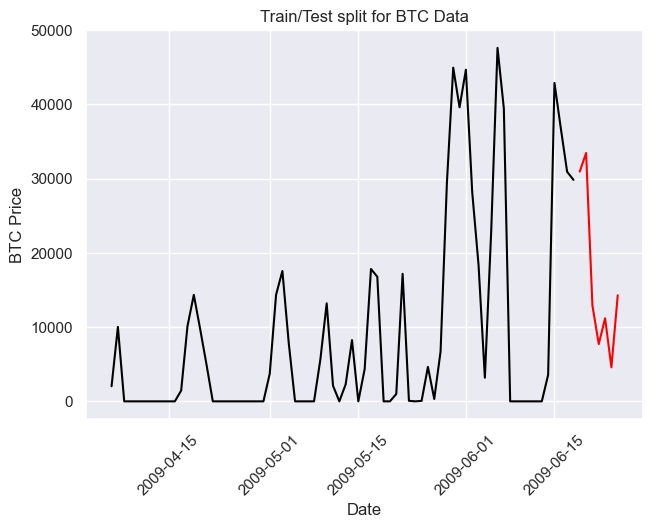

In [66]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

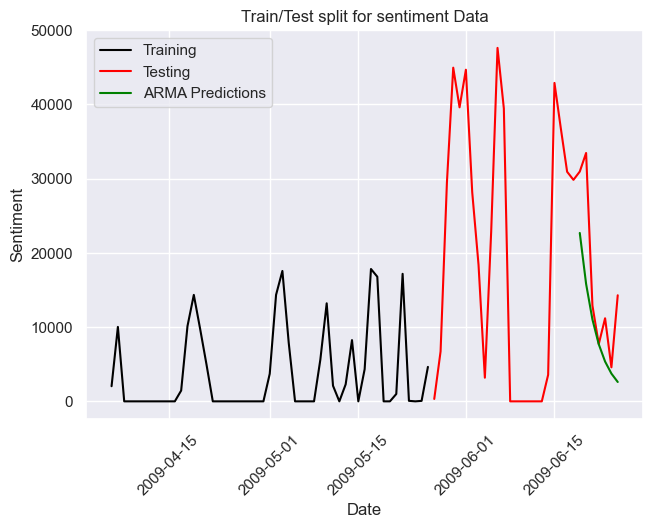

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

y = train['y']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_data = y_pred.conf_int(alpha = 0.05) 
y_pred_data["Predictions"] = ARMAmodel.predict(start = y_pred_data.index[0], 
                                             end = y_pred_data.index[-1])
y_pred_data.index = test.index
y_pred_outARMA = y_pred_data["Predictions"] 

plt.plot(data_train, color = "black", label = 'Training')
plt.plot(data_test, color = "red", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for sentiment Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["y"].values, y_pred_data["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

ARMA RMSE:  8900.10683844985


In [69]:
#ARIMAmodel = SARIMAX(y, order = (2, 2, 2))
#ARIMAmodel = SARIMAX(y, order = (2, 3, 2))
ARIMAmodel = SARIMAX(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_data = y_pred.conf_int(alpha = 0.05) 
y_pred_data["Predictions"] = ARIMAmodel.predict(start = y_pred_data.index[0],
                                              end = y_pred_data.index[-1])
y_pred_data.index = test.index
y_pred_outARIMA = y_pred_data["Predictions"]

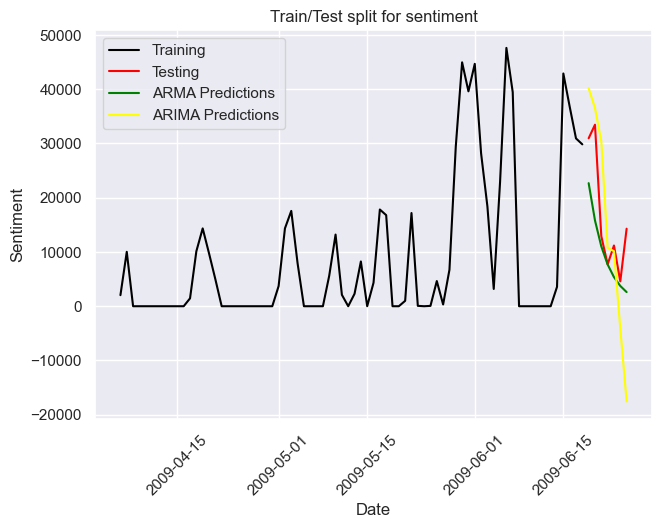

In [70]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for sentiment")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [71]:
arma_rmse = np.sqrt(mean_squared_error(test["y"].values, y_pred_data["Predictions"]))
print("ARIMA RMSE: ",arma_rmse)

ARIMA RMSE:  14638.902124278036


*SARIMA model*

In [72]:
SARIMAXmodel = SARIMAX(y, order = (2,2,2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_data = y_pred.conf_int(alpha = 0.05) 
y_pred_data["Predictions"] = SARIMAXmodel.predict(start = y_pred_data.index[0],
                                                end = y_pred_data.index[-1])
y_pred_data.index = test.index
y_pred_outSARIMAX = y_pred_data["Predictions"] 

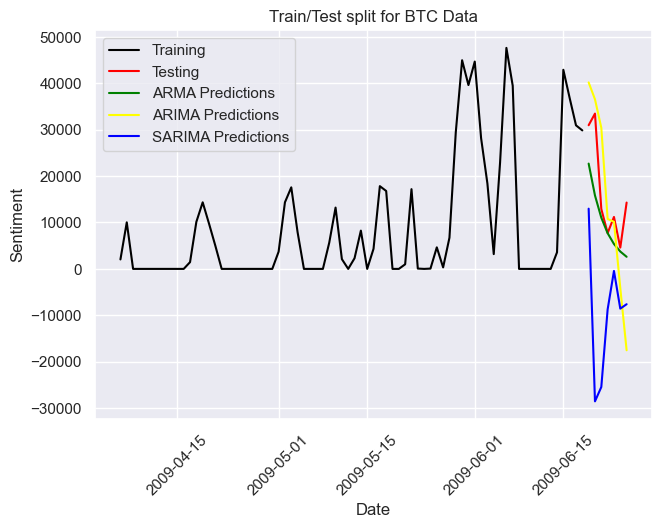

In [73]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

In [74]:
arma_rmse = np.sqrt(mean_squared_error(test["y"].values, y_pred_data["Predictions"]))
print("SARIMA RMSE: ",arma_rmse)

SARIMA RMSE:  30934.474390010742


In [75]:
#Visualisation
#data["y"].plot(figsize = (8, 4), legend = True)

In [76]:
#Training and test set 
#We will use the last month of 2012 --> December 2012
#test_days = 30
#training_set = data.iloc[:-test_days, :] # it will be everything else
#test_set = data.iloc[-test_days:, :] # last 31 days. it will be closer to the last days, closer to the reality

In [77]:
#training_set.tail(2)

In [78]:
#test_set.head(2)

In [79]:
#We create the model
#model = ExponentialSmoothing(endog = training_set.y,
                    #         trend = 'add',
                      #       seasonal = 'add',
                         #    seasonal_periods = 7).fit()

In [80]:
#Predictions
#predictions_hw = model.forecast(steps = len(test_set)).rename("HW")
#predictions_hw.head()

#we want to predict the size of the test set

In [81]:
#Visualisation of our model
#training_set['y'].plot(figsize = (7,4), legend = True)

In [82]:
#Importing special library
#from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [83]:
#Visualisation of our model
#training_set['y'].plot(figsize = (7,4), legend = True)
#test_set['y'].plot(legend = True)

In [84]:
#Visualisation of our model
#training_set['y'].plot(figsize = (7,4), legend = True)
#test_set['y'].plot(legend = True)
#predictions_hw.plot(legend = True)

In [85]:
#Visualisation of our model using less data to see closer (let's use the last 6 months)
#training_set['y']['2008-06-10':].plot(figsize = (7,4), legend = True)
#test_set['y'].plot(legend = True)
#predictions_hw.plot(legend = True)

In [86]:
#We analyse MAE and RMSE
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#print(round(mean_absolute_error(test_set['y'], predictions_hw),0))
#we round the number, and I will include 0 because I don't want decimals in the result for the visualisation
#print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_hw)), 0))
#we round the number, and I will include 0 because I don't want decimals in the result for the visualisation

In [87]:
#MAPE function
#we trying to identify different rates of the variables that we have, then we will see whether is suitable for us or not
# how they are actually impacting
# this is not the best model, the accuracy is very low. We need to check with another model
#SARIMAX is a better model for seasonal data, like this one ### 1.22
#def MAPE(y_true, y_pred):
 # y_true, y_pred = np.array(y_true), np.array(y_pred)
  #return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#MAPE(test_set['y'], predictions_hw)

In [88]:
#!pip install pmdarima

In [89]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX
#from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [90]:
#Training and test set
#test_days = 30
#training_set = data.iloc[:-test_days, :]
#test_set = data.iloc[-test_days:, :]
#test_set.tail(5)

In [91]:
#SARIMAX

#exogenous variables
#train_exog = data.iloc[:-test_days, :]
#test_exog = data.iloc[-test_days:, :] 
#test_exog.head()

In [92]:
#Import especial library
#from pmdarima import auto_arima

In [93]:
#Forecasting model
#model = auto_arima(y = training_set['y'],
                  # X = train_exog,
                  # m = 7,
                  # seasonal = True,
                  # stepwise = False)

In [94]:
#Information of the model
#model.summary()

In [95]:
#Predictions
#predictions_sarimax = pd.Series(model.predict(n_periods= test_days,
 #                             X = test_exog)).rename("SARIMAX")
#predictions_sarimax.index = test_set.index                              
#predictions_sarimax

In [96]:
#Visualisation of the model
#training_set['y']['2009-04-20':].plot(figsize = (7,4), legend = True)
#test_set['y'].plot(legend = True)
#predictions_sarimax.plot(legend = True)

In [97]:
#MODEL ASSESSMENT
#MAE and RMSE
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#print(round(mean_absolute_error(test_set['y'], predictions_sarimax),0))
#print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_sarimax)), 0))

In [98]:
#MAPE function
#def MAPE(y_true, y_pred):
 # y_true, y_pred = np.array(y_true), np.array(y_pred)
 # return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#MAPE(test_set['y'], predictions_sarimax)

In [99]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#from dateutil.parser import parse
#%matplotlib inline

# Import Data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
#result_mul = seasonal_decompose(data['sentiment'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
#result_add = seasonal_decompose(data['sentiment'], model='additive', extrapolate_trend='freq')

# Plot
#plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
#result_add.plot().suptitle('Additive Decompose', fontsize=22)
#plt.show()

In [100]:
#Data Descomposition
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(daily_data.index)
#decomposition.plot();

In [101]:
#Seasonal decomposition --> We use multiplicative method

#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(daily_data["sentiment"], # dependent variable
                                  # model = "additive", period=365)
                                    #freq = 365 # we want to analize by yeat 
#decomposition.plot();

In [102]:
# Time series data source: fpp pacakge data.
#import matplotlib.pyplot as plt
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
#def plot_daily_data(daily_data, x, y, title="", xlabel='date', ylabel='sentiment', dpi=100):
  #  plt.figure(figsize=(16,5), dpi=dpi)
   # plt.plot(x, y, color='tab:red')
  #  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  #  plt.show()

#plot_daily_data(daily_data, x=daily_data.index, y=daily_data.sentiment, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

In [103]:
# Draw Plot
#def plot_data(data, x, y, title="", xlabel='Date', ylabel='sentiment', dpi=100):
   # plt.figure(figsize=(16,5), dpi=dpi)
   # plt.plot(x, y, color='tab:red')
   # plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
   # plt.show()

#plot_data(data, x=data.index, y=data.sentiment, title='Daily sentiment for project data.')    

In [104]:
#Seasonal decomposition --> We use multiplicative method

#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(data["sentiment"], # dependent variable
                                #   model = "additive", period=365)
                                    #freq = 365 # we want to analize by yeat 
#decomposition.plot();

In [105]:
#Data Descomposition
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(data.index)
#decomposition.plot();

In [106]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#from dateutil.parser import parse
#%matplotlib inline

# Import Data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
#result_mul = seasonal_decompose(data['sentiment'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
#result_add = seasonal_decompose(data['sentiment'], model='additive', extrapolate_trend='freq')

# Plot
#plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
#result_add.plot().suptitle('Additive Decompose', fontsize=22)
#plt.show()

In [107]:
#data = data.set_index('date')
#data = data.sort_index()
#data.head()

In [108]:
# Draw Plot
#def plot_data(data, x, y, title="", xlabel='Date', ylabel='sentiment', dpi=100):
 #   plt.figure(figsize=(16,5), dpi=dpi)
  #  plt.plot(x, y, color='tab:red')
   # plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    #plt.show()

#plot_data(data, x=data.index, y=data.sentiment, title='Daily sentiment for project data.')    

In [109]:
#sns.set()
#plt.ylabel('Daily sentiment')
#plt.xlabel('Date')
#plt.xticks(rotation=45)
#plt.plot(data.index, btc['BTC-USD'], )
#plt.show()

In [110]:
#data = data.drop_duplicates('date').sort_values(by=['date'], ascending=True)

In [111]:
#data.shape

In [112]:
# plot the dataset
#ax = data.plot()
#ax.set_ylabel('sentiment')
#plt.show()

In [113]:
#indexeddata.index
#data = data.set_index('date')
#data = data.sort_index()
#data.head()

In [114]:
#data.index

In [115]:
#data = data.asfreq('D')
#data = data.sort_index()
#data.head()

In [116]:
#data = pd.date_range(start="2009-04-06", end="2009-04-12", freq='D')

In [117]:
#data.head()

In [118]:
#daily_tweet_count = data['Tweet_ID'].resample('D').count()
#daily_tweet_count = data['Tweet_ID'].resample('W').count()

In [119]:
#daily_tweet_count.head()

In [120]:
#data.index

In [121]:
# Plot the time series of daily tweet count
#plt.figure(figsize=(10, 6))
#daily_tweet_count.plot()
#plt.xlabel('Date')
#plt.ylabel('Tweet Count')
#plt.title('Daily sentiment Count')
#plt.show()

In [122]:
# plot the dataset
#ax = daily_tweet_count.plot()
#ax.set_ylabel('Tweet count')
#plt.show()

In [123]:
#daily_sentiment_count = data['sentiment'].resample('D').count()

In [124]:
#daily_sentiment_count.head()

In [125]:
# Plot the time series of daily sentiment count
#plt.figure(figsize=(12, 6))
#daily_tweet_count.plot()
#plt.xlabel('Date')
#plt.ylabel('Sentiment')
#plt.title('Daily sentiment Count')
#plt.show()

In [126]:
#data = data[['date', 'sentiment']]
#daily_tweet_count.head()

In [127]:
#data.shape

In [128]:
#Seasonal decomposition --> We use multiplicative method

#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(data_da["sentiment"], # dependent variable
                                  # model = "additive", period=365)
                                    #freq = 365 # we want to analize by yeat 
#decomposition.plot();

In [129]:
#data = data[['date', 'sentiment']]
#daily_tweet_count.head()

In [130]:
#data = data[['sentiment']]
#data.head()

In [131]:
#pip install hvplot

In [132]:
#from matplotlib.figure import Figure
#from matplotlib.backends.backend_agg import FigureCanvas

#%matplotlib inline

#def mpl_plot(avg, highlight):
#    fig = Figure()
 #   FigureCanvas(fig) # not needed in mpl >= 3.1
  #  ax = fig.add_subplot()
 #   avg.plot(ax=ax)
  #  if len(highlight): highlight.plot(style='o', ax=ax)
  #  return fig

#def find_outliers(variable='sentiment', window=30, sigma=10, view_fn=mpl_plot):
 #   avg = data[variable].rolling(window=window).mean()
   # residual = data[variable] - avg
   # std = residual.rolling(window=window).std()
  #  outliers = (np.abs(residual) > std * sigma)
  #  return view_fn(avg, avg[outliers])

In [133]:
#find_outliers(variable='sentiment', window=20, sigma=10)

In [134]:
#import panel as pn
#pn.extension()

#pn.interact(find_outliers)

In [135]:
#kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
#i = pn.interact(find_outliers, **kw)
#i.pprint()

In [136]:
#import param

#class Sentiment(param.Parameterized):
 #   variable  = param.Selector(objects=list(data.columns))
  #  window    = param.Integer(default=10, bounds=(1, 20))
   # sigma     = param.Number(default=10, bounds=(0, 20))

 #   def view(self):
  #      return find_outliers(self.variable, self.window, self.sigma)
    
#obj = Sentiment()
#obj

In [137]:
#pn.Row(obj.param, obj.view)

In [138]:
#text = "<br>\n# Room Occupancy\nSelect the variable, and the time window for smoothing"

#p = pn.Row(i[1][0], pn.Column(text, i[0][0], i[0][1]))
#p

In [139]:
#import hvplot.pandas

#def hvplot(avg, highlight):
 #   return avg.hvplot(height=200) * highlight.hvplot.scatter(color='orange', padding=0.1)

#text2 = "## Sentiment\nSelect the variable and the smoothing values"
#hvp   = pn.interact(find_outliers, view_fn=hvplot, **kw)
#pn.Column(pn.Row(pn.panel(text2, width=400), hvp[0]), hvp[1]).servable("sentiment")

In [140]:
#indexeddata.index
#data = data.set_index('date')
#data = data.asfreq('MS')
#data = data.sort_index()
#data.head()

In [141]:
#Checking null values
#print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

In [142]:
#We still have null values on my dataset
#data.isnull().sum()

In [143]:
#Checking for duplicates
#duplicate_index = data[data.index.duplicated(keep='first')]
#print(duplicate_index)

In [144]:
#data = data[~data.index.duplicated(keep='first')]

In [145]:
#duplicate_index = data[data.index.duplicated(keep='first')]
#print(duplicate_index)

In [146]:
#data.index

In [147]:
#data.shape

In [148]:
#Visualizing the data
#plt.xlabel('date')
#plt.ylabel('sentiment')
#plt.plot(data)
#It can be seen that data is increasing over time

In [149]:
#data = data.asfreq('D')
#data = data.sort_index()
#data.head()

In [150]:
#data.shape

In [151]:
#Sorting And Feature Engineering
#sorted_data = data.sort_values(by='date')
#sorted_data=data.copy()
#sorted_data['date'] = pd.to_datetime(data['date']).data.date

#sorted_data['year']         = pd.DatetimeIndex(sorted_data['date']).year
#sorted_data['month']        = pd.DatetimeIndex(sorted_data['date']).month
#sorted_data['day']          = pd.DatetimeIndex(sorted_data['date']).day

In [152]:
#data['date'].duplicated()

In [153]:
#data['date'] = pd.to_datetime(data['date'],infer_datetime_format=True)
#indexeddata = data.set_index(['date'])
#indexeddata.head(5)

In [154]:
#Rename the dependent variable
#indexeddata = data.rename(columns = {'sentiment' : 'y'})
#indexeddata.head(5)

In [155]:
#Visualizing the data
#plt.xlabel('date')
#plt.ylabel('y')
#plt.plot(indexeddata)
#It can be seen that data is increasing over time

In [156]:
#data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d %H:%M:%S') # '%Y-%m-%d %H:%M:%S'
#indexeddata = data.set_index('date')
#indexeddata.head()

In [157]:
#Rename the dependent variable
#indexeddata = data.rename(columns = {'sentiment' : 'y'})
#indexeddata.head(5)

In [158]:
#indexeddata.index
#data = data.set_index('date')
#data = data.asfreq('MS')
#data = data.sort_index()
#data.head()

In [159]:
#data = data.asfreq('D')
#data = data.sort_index()
#data.head()

In [160]:
#Visualizing the data
#plt.xlabel('date')
#plt.ylabel('y')
#plt.plot(indexeddata)
#It can be seen that data is increasing over time

In [161]:
#data = data.asfreq('D')
#data.index

References:

https://www.w3schools.com/python/pandas/ref_df_get.asp#:~:text=The%20get()%20method%20returns,be%20a%20new%20DataFrame%20object.

timeseries info:

https://medium.com/analytics-vidhya/analysis-of-time-series-data-dad4afa56358

https://twitterdev.github.io/do_more_with_twitter_data/timeseries.html

https://pandas.pydata.org/docs/user_guide/timedeltas.html

https://stackoverflow.com/questions/73126976/setting-time-frequency-makes-dataframes-values-all-null

https://stackoverflow.com/questions/26342713/changing-time-frequency-in-pandas-dataframe

https://stackoverflow.com/questions/54630027/how-to-set-frequency-with-pd-to-datetime?rq=3